In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
NFL_Data = pd.read_csv(r'C:\Users\rbonner\Google Drive\Bootcamp\Final_Project\thirdDown.csv')
NFL_Data.head(10)

,Unnamed: 0,play_id,game_id,shotgun,no_huddle,ydstogo,yardline_100,play_type,half_seconds_remaining,down,pass_length,pass_length.1,run_location,score_differential,fg_prob,td_prob,ep,third_down_converted
0,0,190,2018090600,1,0,10,39.0,pass,1681.0,3.0,deep,deep,NaN,0.0,0.415009,0.333712,2.250232,1.0
1,1,256,2018090600,1,0,1,1.0,pass,1559.0,3.0,short,short,NaN,0.0,0.204515,0.749825,5.661931,0.0
2,2,344,2018090600,1,0,4,92.0,pass,1464.0,3.0,short,short,NaN,0.0,0.093928,0.213978,-1.832560,0.0
3,3,445,2018090600,1,0,5,39.0,run,1404.0,3.0,NaN,NaN,right,0.0,0.395592,0.377457,2.642543,1.0
4,4,636,2018090600,1,0,3,3.0,pass,1207.0,3.0,short,short,NaN,0.0,0.386222,0.567801,4.926552,0.0
5,5,839,2018090600,1,0,12,59.0,pass,981.0,3.0,NaN,NaN,NaN,-3.0,0.272244,0.291378,0.687785,0.0
6,6,949,2018090600,1,0,12,82.0,pass,900.0,3.0,short,short,NaN,3.0,0.133984,0.205101,-1.377900,0.0
7,7,1037,2018090600,1,0,7,57.0,pass,773.0,3.0,short,short,NaN,-3.0,0.269825,0.319773,1.193780,1.0
8,8,1160,2018090600,1,1,1,22.0,run,613.0,3.0,NaN,NaN,left,-3.0,0.415125,0.454985,3.967255,1.0
9,9,1344,2018090600,1,0,18,18.0,pass,413.0,3.0,short,short,NaN,-3.0,0.640069,0.255746,3.489784,0.0


In [3]:
#Filtering Run
Run = NFL_Data.loc[NFL_Data['play_type'] == 'run']
Run.head(10)

,Unnamed: 0,play_id,game_id,shotgun,no_huddle,ydstogo,yardline_100,play_type,half_seconds_remaining,down,pass_length,pass_length.1,run_location,score_differential,fg_prob,td_prob,ep,third_down_converted
3,3,445,2018090600,1,0,5,39.0,run,1404.0,3.0,NaN,NaN,right,0.0,0.395592,0.377457,2.642543,1.0
8,8,1160,2018090600,1,1,1,22.0,run,613.0,3.0,NaN,NaN,left,-3.0,0.415125,0.454985,3.967255,1.0
14,14,2672,2018090600,0,0,1,54.0,run,1429.0,3.0,NaN,NaN,right,-3.0,0.260790,0.458135,2.519950,1.0
19,19,3460,2018090600,0,0,1,87.0,run,691.0,3.0,NaN,NaN,right,4.0,0.097999,0.292759,-0.193396,1.0
22,22,337,2018090900,0,0,1,11.0,run,1464.0,3.0,NaN,NaN,middle,0.0,0.489985,0.442328,4.218395,1.0
27,27,1115,2018090900,1,0,22,87.0,run,900.0,3.0,NaN,NaN,middle,-14.0,0.112259,0.160949,-2.093438,0.0
32,32,2071,2018090900,1,0,9,74.0,run,211.0,3.0,NaN,NaN,right,-20.0,0.102316,0.151007,-0.174255,0.0
40,40,3548,2018090900,1,0,6,71.0,run,988.0,3.0,NaN,NaN,left,37.0,0.189809,0.287887,-0.006412,1.0
45,45,4408,2018090900,1,0,4,84.0,run,120.0,3.0,NaN,NaN,left,44.0,0.056247,0.117593,-0.304254,0.0
47,47,776,2018090907,0,0,8,8.0,run,973.0,3.0,NaN,NaN,left,-3.0,0.565936,0.385835,4.190838,0.0


In [4]:
#Filtering Right
Run_Right = Run.loc[Run['run_location'] == 'right']


In [5]:
#Filtering Left
Run_Left = Run.loc[Run['run_location'] == 'left']


In [6]:
#Filtering Middle
Run_Middle = Run.loc[Run['run_location'] == 'middle']


In [7]:
Run_Middle.shape

(3471, 18)

In [8]:
Run_Right.shape

(3141, 18)

In [9]:
Run_Left.shape

(3086, 18)

# Linear Regression

In [10]:
#Filtering Right_From Shotgun
Run_Right_Shotgun = Run_Right.loc[Run_Right['shotgun'] == 1]
Run_Right_Shotgun.shape

(1409, 18)

In [11]:
#Filtering Right_out Shotgun
Run_Right_outShotgun = Run_Right.loc[Run_Right['shotgun'] == 0]
Run_Right_outShotgun.shape

(1732, 18)

# Shotgun and yrds to go VS third_down converted

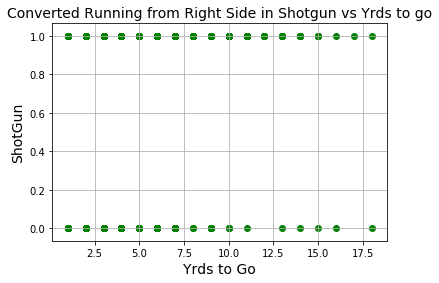

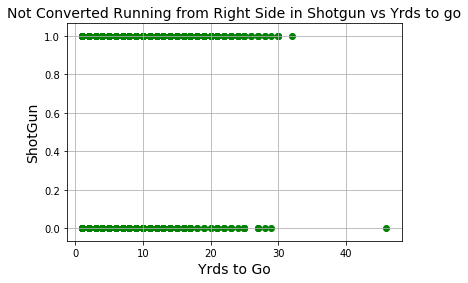

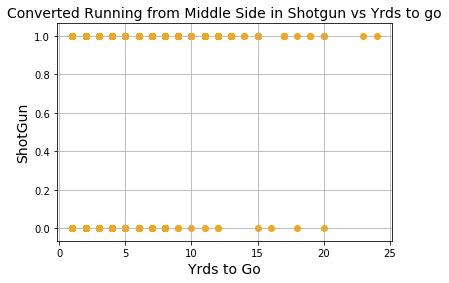

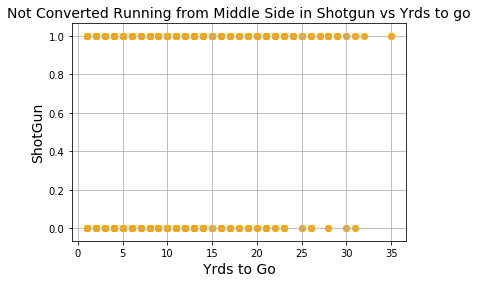

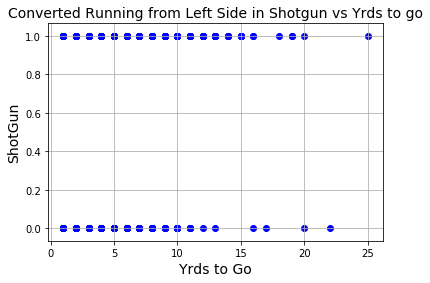

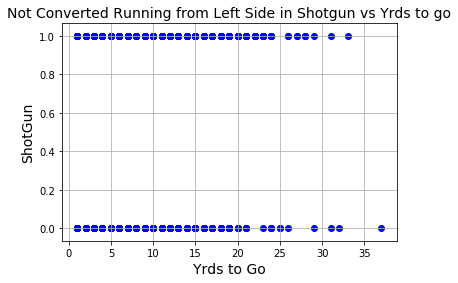

In [12]:

#Scatter from Run_Right side on Shotgun and yrds to go VS third_down converted
Run_Right_Converted = Run_Right.loc[Run_Right['third_down_converted'] == 1]
plt.scatter(Run_Right_Converted['ydstogo'], Run_Right_Converted['shotgun'], color='green')
plt.title('Converted Running from Right Side in Shotgun vs Yrds to go', fontsize=14)
plt.xlabel('Yrds to Go', fontsize=14)
plt.ylabel('ShotGun', fontsize=14)
plt.grid(True)
plt.show()

#Scatter from Run_Right side on Shotgun and yrds to go VS third_down not converted
Run_Right_NotConverted = Run_Right.loc[Run_Right['third_down_converted'] == 0]
plt.scatter(Run_Right_NotConverted['ydstogo'], Run_Right_NotConverted['shotgun'], color='green')
plt.title('Not Converted Running from Right Side in Shotgun vs Yrds to go', fontsize=14)
plt.xlabel('Yrds to Go', fontsize=14)
plt.ylabel('ShotGun', fontsize=14)
plt.grid(True)
plt.show()


#Scatter from Run_Middle side on Shotgun and yrds to go VS third_down converted
Run_Middle_Converted = Run_Middle.loc[Run_Middle['third_down_converted'] == 1]
plt.scatter(Run_Middle_Converted['ydstogo'], Run_Middle_Converted['shotgun'], color='orange')
plt.title('Converted Running from Middle Side in Shotgun vs Yrds to go', fontsize=14)
plt.xlabel('Yrds to Go', fontsize=14)
plt.ylabel('ShotGun', fontsize=14)
plt.grid(True)
plt.show()

#Scatter from Run_Middle side on Shotgun and yrds to go VS third_down not converted
Run_Middle_NotConverted = Run_Middle.loc[Run_Middle['third_down_converted'] == 0]
plt.scatter(Run_Middle_NotConverted ['ydstogo'], Run_Middle_NotConverted ['shotgun'], color='orange')
plt.title('Not Converted Running from Middle Side in Shotgun vs Yrds to go', fontsize=14)
plt.xlabel('Yrds to Go', fontsize=14)
plt.ylabel('ShotGun', fontsize=14)
plt.grid(True)
plt.show()

#Scatter from Run_Left side on Shotgun and yrds to go VS third_down converted
Run_Left_Converted = Run_Left.loc[Run_Left['third_down_converted'] == 1]
plt.scatter(Run_Left_Converted['ydstogo'], Run_Left_Converted['shotgun'], color='blue')
plt.title('Converted Running from Left Side in Shotgun vs Yrds to go', fontsize=14)
plt.xlabel('Yrds to Go', fontsize=14)
plt.ylabel('ShotGun', fontsize=14)
plt.grid(True)
plt.show()

#Scatter from Run_Left side on Shotgun and yrds to go VS third_down not converted
Run_Left_NotConverted = Run_Left.loc[Run_Left['third_down_converted'] == 0]
plt.scatter(Run_Left_NotConverted ['ydstogo'], Run_Left_NotConverted ['shotgun'], color='blue')
plt.title('Not Converted Running from Left Side in Shotgun vs Yrds to go', fontsize=14)
plt.xlabel('Yrds to Go', fontsize=14)
plt.ylabel('ShotGun', fontsize=14)
plt.grid(True)
plt.show()

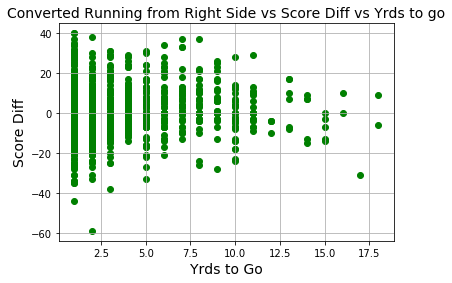

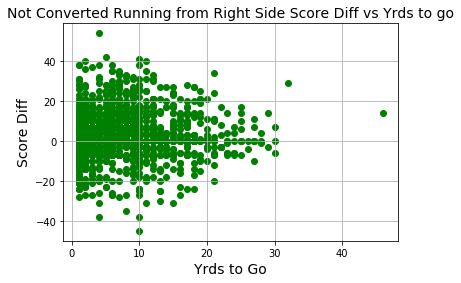

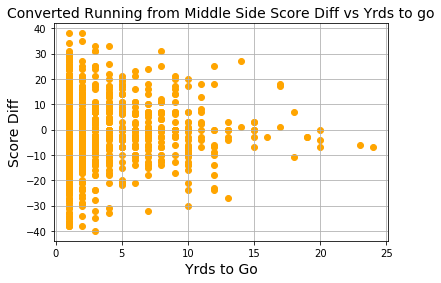

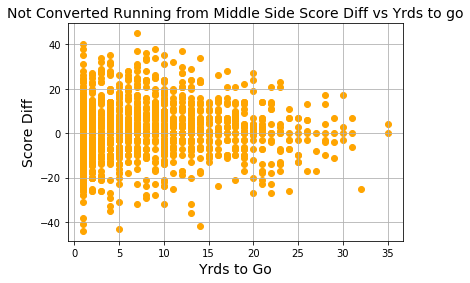

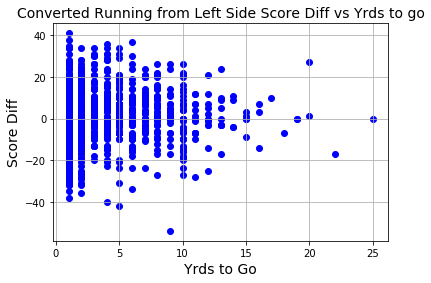

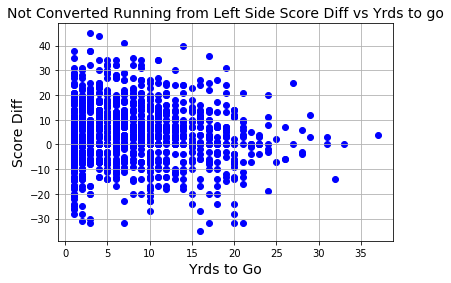

In [13]:
#Scatter from Run_Right side vs Score_Diff and yrds to go VS third_down converted
Run_Right_Converted = Run_Right.loc[Run_Right['third_down_converted'] == 1]
plt.scatter(Run_Right_Converted['ydstogo'], Run_Right_Converted['score_differential'], color='green')
plt.title('Converted Running from Right Side vs Score Diff vs Yrds to go', fontsize=14)
plt.xlabel('Yrds to Go', fontsize=14)
plt.ylabel('Score Diff', fontsize=14)
plt.grid(True)
plt.show()

#Scatter from Run_Right side vs Score_Diff and yrds to go VS third_down not converted
Run_Right_NotConverted = Run_Right.loc[Run_Right['third_down_converted'] == 0]
plt.scatter(Run_Right_NotConverted['ydstogo'], Run_Right_NotConverted['score_differential'], color='green')
plt.title('Not Converted Running from Right Side Score Diff vs Yrds to go', fontsize=14)
plt.xlabel('Yrds to Go', fontsize=14)
plt.ylabel('Score Diff', fontsize=14)
plt.grid(True)
plt.show()

#Scatter from Run_Middle side vs Score_Diff and yrds to go VS third_down converted
Run_Middle_Converted = Run_Middle.loc[Run_Middle['third_down_converted'] == 1]
plt.scatter(Run_Middle_Converted['ydstogo'], Run_Middle_Converted['score_differential'], color='orange')
plt.title('Converted Running from Middle Side Score Diff vs Yrds to go', fontsize=14)
plt.xlabel('Yrds to Go', fontsize=14)
plt.ylabel('Score Diff', fontsize=14)
plt.grid(True)
plt.show()

#Scatter from Run_Middle side vs Score_Diff and yrds to go VS third_down not converted
Run_Middle_NotConverted = Run_Middle.loc[Run_Middle['third_down_converted'] == 0]
plt.scatter(Run_Middle_NotConverted ['ydstogo'], Run_Middle_NotConverted ['score_differential'], color='orange')
plt.title('Not Converted Running from Middle Side Score Diff vs Yrds to go', fontsize=14)
plt.xlabel('Yrds to Go', fontsize=14)
plt.ylabel('Score Diff', fontsize=14)
plt.grid(True)
plt.show()

#Scatter from Run_Left side vs Score_Diff and yrds to go VS third_down converted
Run_Left_Converted = Run_Left.loc[Run_Left['third_down_converted'] == 1]
plt.scatter(Run_Left_Converted['ydstogo'], Run_Left_Converted['score_differential'], color='blue')
plt.title('Converted Running from Left Side Score Diff vs Yrds to go', fontsize=14)
plt.xlabel('Yrds to Go', fontsize=14)
plt.ylabel('Score Diff', fontsize=14)
plt.grid(True)
plt.show()

#Scatter from Run_Left side vs Score_Diff and yrds to go VS third_down not converted
Run_Left_NotConverted = Run_Left.loc[Run_Left['third_down_converted'] == 0]
plt.scatter(Run_Left_NotConverted ['ydstogo'], Run_Left_NotConverted ['score_differential'], color='blue')
plt.title('Not Converted Running from Left Side Score Diff vs Yrds to go', fontsize=14)
plt.xlabel('Yrds to Go', fontsize=14)
plt.ylabel('Score Diff', fontsize=14)
plt.grid(True)
plt.show()

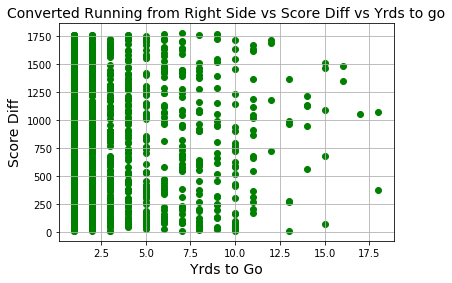

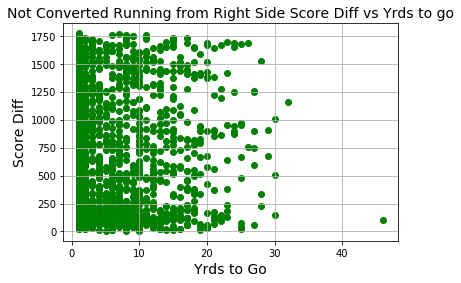

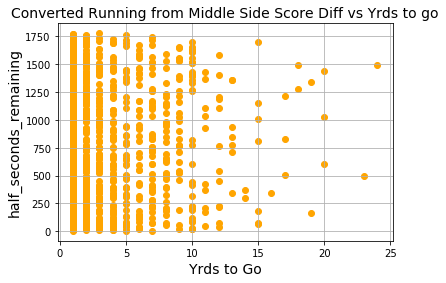

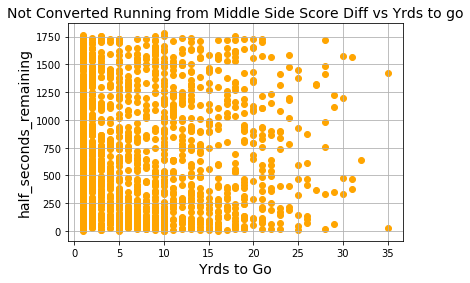

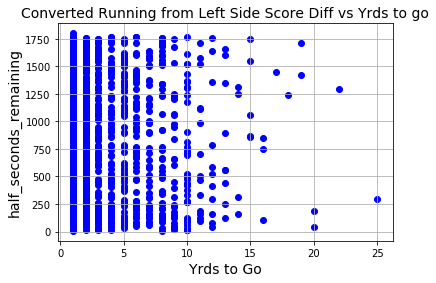

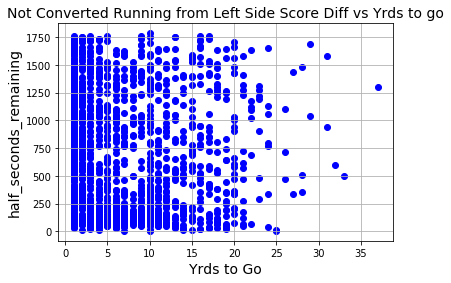

In [14]:
#Scatter from Run_Right side vs half_seconds_remaining and yrds to go VS third_down converted
Run_Right_Converted = Run_Right.loc[Run_Right['third_down_converted'] == 1]
plt.scatter(Run_Right_Converted['ydstogo'], Run_Right_Converted['half_seconds_remaining'], color='green')
plt.title('Converted Running from Right Side vs Score Diff vs Yrds to go', fontsize=14)
plt.xlabel('Yrds to Go', fontsize=14)
plt.ylabel('Score Diff', fontsize=14)
plt.grid(True)
plt.show()

#Scatter from Run_Right side vs half_seconds_remaining and yrds to go VS third_down not converted
Run_Right_NotConverted = Run_Right.loc[Run_Right['third_down_converted'] == 0]
plt.scatter(Run_Right_NotConverted['ydstogo'], Run_Right_NotConverted['half_seconds_remaining'], color='green')
plt.title('Not Converted Running from Right Side Score Diff vs Yrds to go', fontsize=14)
plt.xlabel('Yrds to Go', fontsize=14)
plt.ylabel('Score Diff', fontsize=14)
plt.grid(True)
plt.show()

#Scatter from Run_Middle side vs half_seconds_remaining and yrds to go VS third_down converted
Run_Middle_Converted = Run_Middle.loc[Run_Middle['third_down_converted'] == 1]
plt.scatter(Run_Middle_Converted['ydstogo'], Run_Middle_Converted['half_seconds_remaining'], color='orange')
plt.title('Converted Running from Middle Side Score Diff vs Yrds to go', fontsize=14)
plt.xlabel('Yrds to Go', fontsize=14)
plt.ylabel('half_seconds_remaining', fontsize=14)
plt.grid(True)
plt.show()

#Scatter from Run_Middle side vs half_seconds_remaining and yrds to go VS third_down not converted
Run_Middle_NotConverted = Run_Middle.loc[Run_Middle['third_down_converted'] == 0]
plt.scatter(Run_Middle_NotConverted ['ydstogo'], Run_Middle_NotConverted ['half_seconds_remaining'], color='orange')
plt.title('Not Converted Running from Middle Side Score Diff vs Yrds to go', fontsize=14)
plt.xlabel('Yrds to Go', fontsize=14)
plt.ylabel('half_seconds_remaining', fontsize=14)
plt.grid(True)
plt.show()

#Scatter from Run_Left side on Shotgun and yrds to go VS third_down converted
Run_Left_Converted = Run_Left.loc[Run_Left['third_down_converted'] == 1]
plt.scatter(Run_Left_Converted['ydstogo'], Run_Left_Converted['half_seconds_remaining'], color='blue')
plt.title('Converted Running from Left Side Score Diff vs Yrds to go', fontsize=14)
plt.xlabel('Yrds to Go', fontsize=14)
plt.ylabel('half_seconds_remaining', fontsize=14)
plt.grid(True)
plt.show()

#Scatter from Run_Left side vs half_seconds_remaining and yrds to go VS third_down not converted
Run_Left_NotConverted = Run_Left.loc[Run_Left['third_down_converted'] == 0]
plt.scatter(Run_Left_NotConverted ['ydstogo'], Run_Left_NotConverted ['half_seconds_remaining'], color='blue')
plt.title('Not Converted Running from Left Side Score Diff vs Yrds to go', fontsize=14)
plt.xlabel('Yrds to Go', fontsize=14)
plt.ylabel('half_seconds_remaining', fontsize=14)
plt.grid(True)
plt.show()

In [15]:
#Define X & Y From Right side
Xr = Run_Right[['ydstogo','half_seconds_remaining', 'shotgun', 'score_differential']]
Yr = Run_Right['third_down_converted']
# Begin regression 
from sklearn import linear_model
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(Xr, Yr)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 0.6175660016595703
Coefficients: 
 [-3.94662210e-02  5.93283235e-05  8.52806918e-02 -9.93281391e-04]


In [16]:
import statsmodels.api as sm
# with statsmodels
X = sm.add_constant(Xr) # adding a constant 
model = sm.OLS(Yr, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                             OLS Regression Results                             
Dep. Variable:     third_down_converted   R-squared:                       0.167
Model:                              OLS   Adj. R-squared:                  0.166
Method:                   Least Squares   F-statistic:                     157.2
Date:                  Thu, 14 Nov 2019   Prob (F-statistic):          8.94e-123
Time:                          20:59:29   Log-Likelihood:                -1992.0
No. Observations:                  3141   AIC:                             3994.
Df Residuals:                      3136   BIC:                             4024.
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const   

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [17]:
#Define X & Y From Left side
Xl = Run_Left[['ydstogo','half_seconds_remaining', 'shotgun', 'score_differential']]
Yl = Run_Left['third_down_converted']
# Begin regression 
from sklearn import linear_model
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(Xl, Yl)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 0.6201276250930593
Coefficients: 
 [-3.75638542e-02  6.87941721e-05  8.39268764e-02 -3.16435272e-03]


In [18]:
import statsmodels.api as sm
# with statsmodels
X = sm.add_constant(Xl) # adding a constant 
model = sm.OLS(Yl, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                             OLS Regression Results                             
Dep. Variable:     third_down_converted   R-squared:                       0.169
Model:                              OLS   Adj. R-squared:                  0.168
Method:                   Least Squares   F-statistic:                     156.9
Date:                  Thu, 14 Nov 2019   Prob (F-statistic):          2.21e-122
Time:                          20:59:29   Log-Likelihood:                -1951.6
No. Observations:                  3086   AIC:                             3913.
Df Residuals:                      3081   BIC:                             3943.
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const   

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [19]:
#Define X & Y From Middle side
Xm = Run_Middle[['ydstogo','half_seconds_remaining', 'shotgun', 'score_differential']]
Ym = Run_Middle['third_down_converted']
# Begin regression 
from sklearn import linear_model
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(Xm, Ym)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 0.6534754205561655
Coefficients: 
 [-3.71455330e-02  6.44051433e-05  8.01723626e-03 -2.18619266e-03]


In [20]:
import statsmodels.api as sm
# with statsmodels
X = sm.add_constant(Xm) # adding a constant 
model = sm.OLS(Ym, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                             OLS Regression Results                             
Dep. Variable:     third_down_converted   R-squared:                       0.198
Model:                              OLS   Adj. R-squared:                  0.197
Method:                   Least Squares   F-statistic:                     213.8
Date:                  Thu, 14 Nov 2019   Prob (F-statistic):          3.78e-164
Time:                          20:59:29   Log-Likelihood:                -2132.8
No. Observations:                  3471   AIC:                             4276.
Df Residuals:                      3466   BIC:                             4306.
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const   

In [21]:
#Define X & Y From Right side and yds to go
Xry = Run_Right[['ydstogo', 'shotgun']]
Yry = Run_Right['third_down_converted']
# Begin regression 
from sklearn import linear_model
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(Xry, Yry)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 0.6630501352683225
Coefficients: 
 [-0.04073791  0.09557478]


In [22]:
import statsmodels.api as sm
# with statsmodels
X = sm.add_constant(Xry) # adding a constant 
model = sm.OLS(Yry, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                             OLS Regression Results                             
Dep. Variable:     third_down_converted   R-squared:                       0.162
Model:                              OLS   Adj. R-squared:                  0.162
Method:                   Least Squares   F-statistic:                     303.6
Date:                  Thu, 14 Nov 2019   Prob (F-statistic):          3.03e-121
Time:                          20:59:29   Log-Likelihood:                -2001.3
No. Observations:                  3141   AIC:                             4009.
Df Residuals:                      3138   BIC:                             4027.
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6631      0.012

In [23]:
#Define X & Y From Middle side and yds to go
Xmy = Run_Middle[['ydstogo', 'shotgun']]
Ymy = Run_Middle['third_down_converted']
# Begin regression 
from sklearn import linear_model
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(Xmy, Ymy)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 0.7048343229137454
Coefficients: 
 [-0.03807961  0.01320921]


In [24]:
import statsmodels.api as sm
# with statsmodels
X = sm.add_constant(Xmy) # adding a constant 
model = sm.OLS(Ymy, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                             OLS Regression Results                             
Dep. Variable:     third_down_converted   R-squared:                       0.190
Model:                              OLS   Adj. R-squared:                  0.190
Method:                   Least Squares   F-statistic:                     407.1
Date:                  Thu, 14 Nov 2019   Prob (F-statistic):          1.58e-159
Time:                          20:59:29   Log-Likelihood:                -2149.5
No. Observations:                  3471   AIC:                             4305.
Df Residuals:                      3468   BIC:                             4323.
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7048      0.011

In [27]:
# Converted Runs
Converted = NFL_Data.loc[NFL_Data['third_down_converted'] == 1]
Converted_R = Converted.loc[Converted['play_type'] == "run"]

len(Converted_R.columns)

18

In [28]:
Converted_R.head(10)

,Unnamed: 0,play_id,game_id,shotgun,no_huddle,ydstogo,yardline_100,play_type,half_seconds_remaining,down,pass_length,pass_length.1,run_location,score_differential,fg_prob,td_prob,ep,third_down_converted
3,3,445,2018090600,1,0,5,39.0,run,1404.0,3.0,NaN,NaN,right,0.0,0.395592,0.377457,2.642543,1.0
8,8,1160,2018090600,1,1,1,22.0,run,613.0,3.0,NaN,NaN,left,-3.0,0.415125,0.454985,3.967255,1.0
14,14,2672,2018090600,0,0,1,54.0,run,1429.0,3.0,NaN,NaN,right,-3.0,0.260790,0.458135,2.519950,1.0
19,19,3460,2018090600,0,0,1,87.0,run,691.0,3.0,NaN,NaN,right,4.0,0.097999,0.292759,-0.193396,1.0
22,22,337,2018090900,0,0,1,11.0,run,1464.0,3.0,NaN,NaN,middle,0.0,0.489985,0.442328,4.218395,1.0
40,40,3548,2018090900,1,0,6,71.0,run,988.0,3.0,NaN,NaN,left,37.0,0.189809,0.287887,-0.006412,1.0
53,53,2120,2018090907,0,0,1,35.0,run,1631.0,3.0,NaN,NaN,left,-7.0,0.365093,0.475407,3.584501,1.0
66,66,218,2018090906,1,0,2,5.0,run,1605.0,3.0,NaN,NaN,left,0.0,0.554042,0.385633,4.051023,1.0
67,67,333,2018090906,0,0,1,59.0,run,1539.0,3.0,NaN,NaN,middle,-7.0,0.234232,0.443175,2.108085,1.0
80,80,3858,2018090906,0,0,1,1.0,run,537.0,3.0,NaN,NaN,left,-23.0,0.197196,0.744081,5.624668,1.0


In [29]:
CR = Converted_R.drop(columns = ['Unnamed: 0'])
CR.head()
len(CR.columns)

17

In [61]:
CR_1 = CR.dropna(subset=['run_location'])
CR_1.head()


,play_id,game_id,shotgun,no_huddle,ydstogo,yardline_100,play_type,half_seconds_remaining,down,pass_length,pass_length.1,run_location,score_differential,fg_prob,td_prob,ep,third_down_converted
3,445,2018090600,1,0,5,39.0,run,1404.0,3.0,NaN,NaN,right,0.0,0.395592,0.377457,2.642543,1.0
8,1160,2018090600,1,1,1,22.0,run,613.0,3.0,NaN,NaN,left,-3.0,0.415125,0.454985,3.967255,1.0
14,2672,2018090600,0,0,1,54.0,run,1429.0,3.0,NaN,NaN,right,-3.0,0.260790,0.458135,2.519950,1.0
19,3460,2018090600,0,0,1,87.0,run,691.0,3.0,NaN,NaN,right,4.0,0.097999,0.292759,-0.193396,1.0
22,337,2018090900,0,0,1,11.0,run,1464.0,3.0,NaN,NaN,middle,0.0,0.489985,0.442328,4.218395,1.0


In [120]:
# 1 =  right, 2 = middle, 3 = left
CR_R = CR_1.replace(['right', 'middle', 'left'], 
                     [1, 2, 3])

In [123]:
#run = 1, pass =2
CR_Final=CR_R.replace(['run', 'pass'], 
                     [1, 2])
CR_Final.head()

,play_id,game_id,shotgun,no_huddle,ydstogo,yardline_100,play_type,half_seconds_remaining,down,pass_length,pass_length.1,run_location,score_differential,fg_prob,td_prob,ep,third_down_converted
3,445,2018090600,1,0,5,39.0,1,1404.0,3.0,NaN,NaN,1,0.0,0.395592,0.377457,2.642543,1.0
8,1160,2018090600,1,1,1,22.0,1,613.0,3.0,NaN,NaN,3,-3.0,0.415125,0.454985,3.967255,1.0
14,2672,2018090600,0,0,1,54.0,1,1429.0,3.0,NaN,NaN,1,-3.0,0.260790,0.458135,2.519950,1.0
19,3460,2018090600,0,0,1,87.0,1,691.0,3.0,NaN,NaN,1,4.0,0.097999,0.292759,-0.193396,1.0
22,337,2018090900,0,0,1,11.0,1,1464.0,3.0,NaN,NaN,2,0.0,0.489985,0.442328,4.218395,1.0


In [31]:
#CR_1.columns.get_loc('run_location')

11

In [104]:
# #step 0: Reform data
# oh1 = CR_1.values
# x1 = oh1[:, 0:17]
# y1 = oh1[:,11]

In [105]:
# #one hot coding
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# label_encoder.fit(y1)
# encoded_y1 = label_encoder.transform(y1)
# fit_transform(CR['run_location'].astype(str))

In [106]:
# encoded_y1.dtype

dtype('int32')

In [107]:
# CR_1.columns.get_loc('play_type')

6

In [108]:
# #step 0: Reform data

# x2 = oh1[:, 0:17]
# y2 = oh1[:, 6]

In [109]:
# #one hot coding
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# label_encoder.fit(y2)
# encoded_y2 = label_encoder.transform(y2)
# # fit_transform(CR['run_location'].astype(str))

In [110]:
# encoded_y2.dtype

dtype('int32')

In [111]:
# y1=np.array(y1)
# y2=np.array(y2)


In [112]:
# from keras.utils import to_categorical

# #step 2
# one_hot_y1 = to_categorical(encoded_y1)
# one_hot_y2 = to_categorical(encoded_y2)
# one_hot_y1
# one_hot_y2

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [113]:
# oh1

array([[445, 2018090600, 1, ..., 0.3774566601664061, 2.642543436776396,
        1.0],
       [1160, 2018090600, 1, ..., 0.4549845629613575, 3.967254581708053,
        1.0],
       [2672, 2018090600, 0, ..., 0.4581346023700066, 2.519950095501424,
        1.0],
       ...,
       [819, 2010010308, 0, ..., 0.3889014989327876, 4.0786665638600486,
        1.0],
       [1734, 2010010308, 0, ..., 0.3630970976928048, 2.7462536195392198,
        1.0],
       [3338, 2010010308, 0, ..., 0.4168695365453912, 2.512945408063474,
        1.0]], dtype=object)

In [124]:

#Define X & Y From Right side
X = CR_Final[['ydstogo','half_seconds_remaining', 'shotgun', 'score_differential', 'run_location', 'yardline_100']]
y = CR_Final['play_type']

# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)





In [125]:
# Create the logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier
classifier.fit(X_train, y_train)
print(f"First 10 predictions: {predictions[:10]}")
print(f"First 10 Actual Labels: {y_test[:10,tolist()]}")
pd.Dataframe({"Prediction:": predictions, "Actual:": y_test}).reset_index(drop=True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Unknown label type: 'unknown'